# World Happiness Regression Analysis
### Diondra Stubbs
### 2021

## About the Dataset

This dataset contains the Happiness Score for over 150 countries for the year of 2020. The data gathered from the Gallup World Poll gives a national average of Happiness scores for countries all over the world. It is an annual landmark survey of the state of global happiness.

More about this dataset: https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2020.csv

### Dataset Features

1. Country Name
2. Regional Indicator
3. Happiness score (Ladder Score)
5. Healthy Life Expectancy (HLE)
6. Social support
7. Freedom to make life choices
8. Generosity
9. Perceptions of Corruption

Explanation of the features: https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf

In [31]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=1,palette='colorblind')

## Loading in the Data

In [60]:
# loading in data
data_url = 'https://raw.githubusercontent.com/stubbsdiondra/PortfolioProjects/main/World%20Happiness%202020%20Project/2020.csv'

In [61]:
# loading into a dataframe
df = pd.read_csv(data_url)

In [62]:
# printing the dataframe
df

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...
148,Central African Republic,Africa,3.4800,0.320000,45.200000,0.640000,0.080000,0.890000
149,Rwanda,Africa,3.3100,0.540000,61.100000,0.900000,0.060000,0.180000
150,Zimbabwe,Africa,3.3000,0.760000,55.620000,0.710000,-0.070000,0.810000
151,South Sudan,Africa,2.8200,0.550000,51.000000,0.450000,0.020000,0.760000


There should be 153 rows since there is data for 153 countries. Let's also look at the columns.

In [63]:
df.shape

(153, 8)

In [64]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Happiness Scores',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

## Regression Analysis

### Objective

The goal is to predict the happiness score given the other features in the dataset.

The dataset has columns Country Name, Regional Indicator, Happiness Scores, Social Support, Healthy Life Expectancy, Freedom to Make Life Choices, Generosity and Perceptions of Corruption. The desired target we are trying to predict is Happiness Scores. 

Since Happiness Score is a quantity, it is a continuous target. Regression is supervised machine learning for a continuous target so that is why I am choosing to use fit a regression model in order to predict the Happiness Score of countries in Africa.

### Preparing the Data

In order to begin the regression analysis, I need to eliminate the columns that won't be used in the analysis. I also need to set the target variable and the feature variables.

In [65]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Happiness Scores',
       'Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

In [66]:
# defining the target variable vs other features that contribute
feature_vars = df
target_var = df['Happiness Scores']

In [67]:
feature_vars.head()

,Country Name,Regional Indicator,Happiness Scores,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,Finland,Europe,7.8087,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Europe,7.6456,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Europe,7.5599,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Europe,7.5045,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Europe,7.4880,0.952487,73.200783,0.955750,0.134533,0.263218


In [68]:
# dropping irrelevant features
feature_vars = feature_vars.drop('Happiness Scores', axis = 1)
feature_vars = feature_vars.drop('Country Name', axis = 1)
feature_vars = feature_vars.drop('Regional Indicator', axis = 1)

In [69]:
feature_vars.head()

,Social Support,Healthy Life Expectancy,Freedom to Make Life Choices,Generosity,Perceptions of Corruption
0,0.954330,71.900825,0.949172,-0.059482,0.195445
1,0.955991,72.402504,0.951444,0.066202,0.168489
2,0.942847,74.102448,0.921337,0.105911,0.303728
3,0.974670,73.000000,0.948892,0.246944,0.711710
4,0.952487,73.200783,0.955750,0.134533,0.263218


In [70]:
target_var.head()

0    7.8087
1    7.6456
2    7.5599
3    7.5045
4    7.4880
Name: Happiness Scores, dtype: float64

Let's look at the pair plots to see if the data is linear.

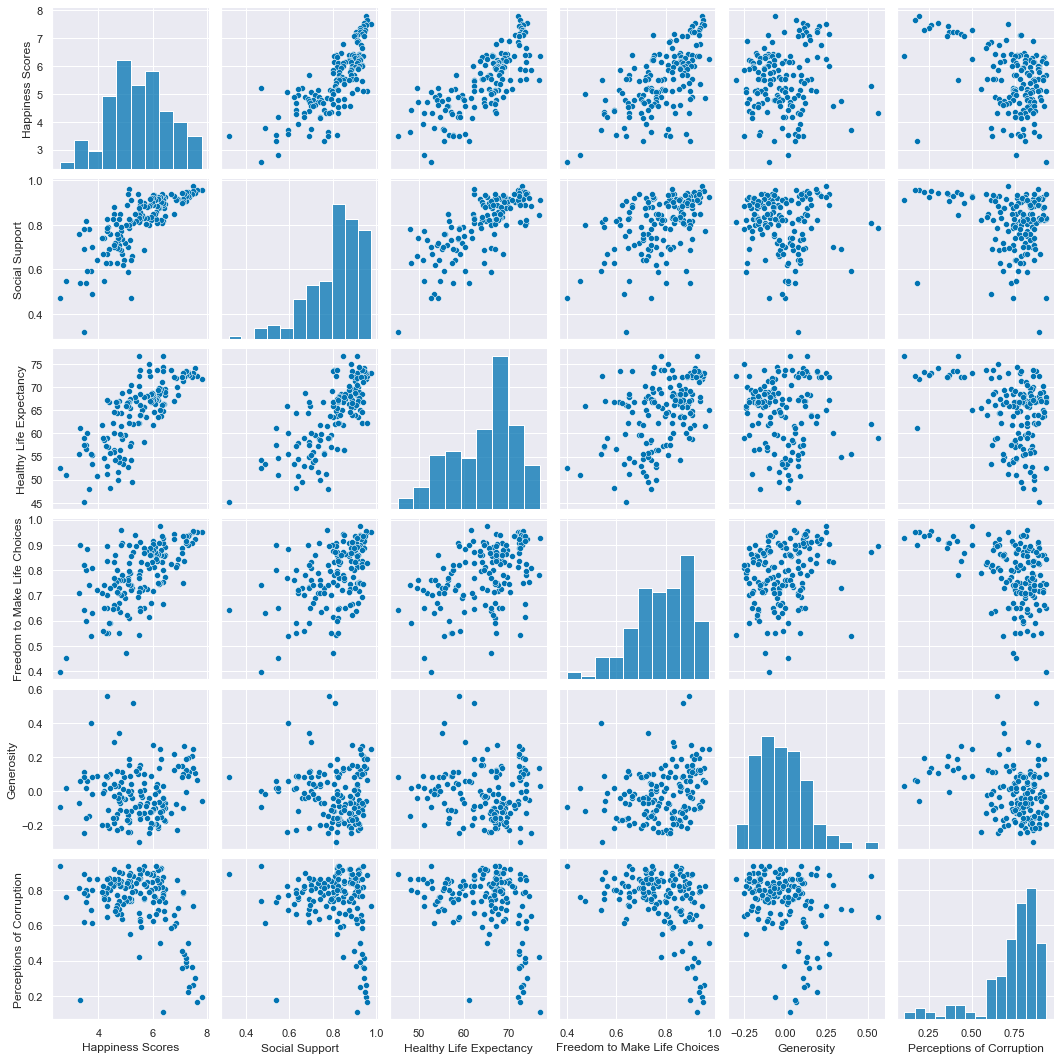

In [71]:
sns.pairplot(df[['Happiness Scores','Social Support', 'Healthy Life Expectancy','Freedom to Make Life Choices', 'Generosity','Perceptions of Corruption']])

In this pair plot we see quite a bit of linear patterns. The scatter plots are mostly showing positive linear associations.

## Fitting the Model

I'm going to fit a linear model with 75% training data which means 25% held out test data.

In [72]:
X_train,X_test, y_train,y_test = train_test_split(feature_vars, target_var, train_size=.75)

In [73]:
lm = linear_model.LinearRegression()

In [74]:
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = lm.predict(X_test)

### How well does my model perform
#### Computing the R^2 score for linear regression

The coefficient of determination or R^2 represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

In [76]:
r2_score(y_test, y_pred)

0.7396535260177383

With all the features we get a R^2 score (coefficient of determination) of 0.7495367577946677. This means that ~75% of the data points fall on the regression line and ~75% of the independent/predictor variables in this model explain all the variation in y (Happiness Scores).

This model performs fairly well.

### Examinging the Coefficients

In [77]:
lm.coef_, lm.intercept_

(array([ 3.19915713,  0.05331901,  1.69549096,  0.198915  , -1.17923196]),
 -1.0237261717859925)

In [78]:
feature_vars.columns

Index(['Social Support', 'Healthy Life Expectancy',
       'Freedom to Make Life Choices', 'Generosity',
       'Perceptions of Corruption'],
      dtype='object')

The linear model is:

Happiness Score = 3.69495764*Social Support +  0.04226244*Healthy Life Expectancy +  1.9962836*Freedom to Make Life Choices - 0.09721062*Generosity - 0.72236804*Perceptions of Corruption - 1.2107436432803613.

The coefficients tell us the relationship between the Happiness Scores and the other features. When Happiness Score increases by one Social support increases by 3.69, Healthy Life Expectancy increases by 0.04, Freedom to Make Life Choices increases by 1.996, Generosity decreases by 0.097 and Perceptions of Corruptiom decreases by 0.72

### Examining the Residuals

Residuals are the vertical distance between a data point and the regression line. They are the difference between any data point and the regression line, and are sometimes called “errors.” They  indicate the extent to which a model accounts for the variation in the observed data.

The residual plot is below. The red lines represent the residuals

Text(0, 0.5, 'Happiness Score')

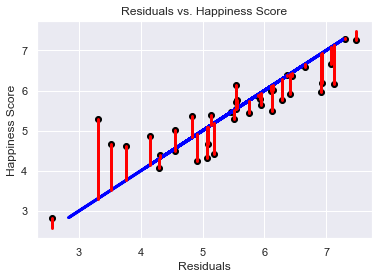

In [79]:
plt.scatter(y_test,y_pred, color='black')
plt.plot(y_pred,y_pred, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(y_test, y_pred,y_test)]

plt.title('Residuals vs. Happiness Score')
plt.xlabel('Residuals')
plt.ylabel('Happiness Score')

The plot shows us that the residuals are spread out around the regression line.

### MSE
Mean squared error (MSE) measures the amount of error in a model, looking at the average squared difference between the observed and predicted values. The lower the MSE value there more accurate the model is.

By calculating MSE we are geeting the avg length of all the residuals to cpature the error in this model.

In [80]:
mean_squared_error(y_test,y_pred)

0.3385619878815136

The MSE is 0.39. In other words, the average squared difference between the observed and predicted values is 0.39. The closer to 0 MSE is the better. 

The predictors aren't perfect but it is a pretty good fit, given that ~75% of the independent/predictor variables in this model explain all the variation in y and the amount of error in a model isn't extreme. 

Therefore, the model fits the data well.

## Using the Prediction Model

In 2021 Finland scored a Happiness Score of 7.842. For Social support the received 0.954, Healthy life expectancy 72 and Freedom to make life choices 0.949. 

Let's see how our model performs for one year in the future.

The linear model is:

Happiness Score = 3.69495764Social Support + 0.04226244Healthy Life Expectancy + 1.9962836Freedom to Make Life Choices - 0.09721062Generosity - 0.72236804*Perceptions of Corruption - 1.2107436432803613.

In [81]:
 3.69495764*0.954 + 0.04226244*72 + 1.9962836*0.949 - 0.09721062*0 - 0.72236804*0 - 1.2107436432803613

7.2516147616796385

This makes sense since our model is not 100% perfect. However, it is fairly close to the actualy value. The error is:

In [82]:
7.842-7.252

0.5899999999999999